In [1]:
from numpy import array
from random import shuffle
from pickle import dump
from bs4 import BeautifulSoup
import requests
import pandas as pd

from nltk import word_tokenize
from nltk.stem.lancaster import LancasterStemmer

from keras.models import Sequential
from keras.layers import Dense

from wordcloud import WordCloud
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
def TrainingData():
    link = "http://alaskaairlinescenter.com/contact-us/faq"
    response = requests.get(link)
    soup = BeautifulSoup(response.text, "lxml")
    soup.prettify()
    
    answers = []
    for answer in soup.find_all("p"):
        answers.append(answer.get_text())

    TrainingData = pd.DataFrame(list(zip(answers)), columns=['FAQ Answer'])
    TrainingData.to_csv("TrainingData.csv")
    return TrainingData


In [3]:
TrainingData().head()

,FAQ Answer
0,Personal cameras without detachable lens that ...
1,Handheld banners and signs are welcome at Alas...
2,Alaska Airlines Center can be reached by phone...
3,"Prohibited items include, but are not limited ..."
4,The re-entry policy for Alaska Airlines Center...


In [4]:
TrainingData().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 1 columns):
FAQ Answer    13 non-null object
dtypes: object(1)
memory usage: 184.0+ bytes


In [5]:
TrainingData().shape

(13, 1)

In [6]:
TrainingData().describe()

,FAQ Answer
count,13
unique,13
top,ADA tickets are available for all events at Al...
freq,1


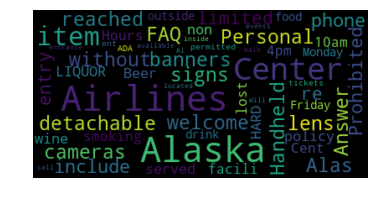

In [7]:
wordcloud = WordCloud(max_font_size=42).generate(str(TrainingData()))
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [8]:
def parseDump():
    with open('data/TrainingData.csv') as data:
        intents = data
    vocabulary = []
    classes = []
    queries = []
    intentList = []
  
            
    # stem and lower each word and remove duplicates
    vocabulary = [stemmer.stem(w.lower()) for w in vocabulary if w not in ignored]
    vocabulary = sorted(list(set(vocabulary)))
    classes = sorted(list(set(classes)))
    # create our training data
    training = []
    output = []
    # create an empty array for our output
    output_empty = [0] * len(classes)
    # training set, bag of words for each sentence
    for query in queries:
        # initialize our bag of words
        bag = []
        # list of tokenized words for the pattern
        pattern_words = query[0]
        # stem each word
        pattern_words = [stemmer.stem(word.lower()) for word in pattern_words]
        # create our bag of words array
        for w in vocabulary:
            bag.append(1) if w in pattern_words else bag.append(0)
        
        # output is a '0' for each tag and '1' for current tag
        output_row = list(output_empty)
        output_row[classes.index(query[1])] = 1

        training.append([bag, output_row])
    # shuffle our features and turn into np.array
    shuffle(training)
    training = array(training)
    # create train and test lists
    x_train = array(list(training))
    y_train = array(list(training))
    return x_train, y_train, vocabulary, classes, intents

In [ ]:
def trainModel():
    # Build model
    model = Sequential()
    model.add(Dense(8, activation='relu'))
    model.add(Dense(8, activation='relu'))
    model.add(Dense(y_train.shape, activation='softmax'))
    # Train Model
    model.compile(loss='categorical_crossentropy', optimizer='RMSprop', metrics=['accuracy'])
    model.fit(x_train, y_train, batch_size=8, epochs=1000, verbose=1)
    return model

ignored = ['?']
x_train, y_train, vocabulary, classes, intents = parseDump()
model = trainModel()

# Save trained model
model.save('trainedModel/FAQbot_model.h5')
# Pickle the extra files
with open('trainedModel/vars.pkl', 'wb') as f:
    dump([vocabulary, classes, ignored, intents], f)
print('Training successful, model saved!')